In [2]:
import scipy.stats as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Some formulas

\begin{equation*}
P(X\ge x)=1 - \left[\sum_{ x=0 }^{ X }{{n \choose x} p^x (1-p)^{ n-x}}\right]
\end{equation*}

\begin{equation*}
\begin{matrix} P(X\ge x)=1-\left[ \sum _{ x=0 }^{ X }{ \frac { { \lambda  }^{ x }{ e }^{ -\lambda  } }{ x! }  }  \right]  \end{matrix}
\end{equation*}

\begin{equation*}
p(X=x) = \frac { { \lambda  }^{ x }{ e }^{ -\lambda  } }{ x! } \\
\lambda\; is\; the\; rate\; parameter\; defined\; in\; this\; case\; by\; p\cdot n
\end{equation*}


\begin{equation*}
E(x) = pn
\end{equation*}



\begin{equation*}
p = probability\, of\, an\, event
\end{equation*}
\begin{equation*}
n = number\, of\, observations
\end{equation*}


\begin{equation*}
P(X=x)   = {n \choose x} p^x (1-p)^{ n-x}
\end{equation*}

\begin{equation*}
P(blowout) = 0.05
\end{equation*}
\begin{equation*}
P(patch) = 0.3
\end{equation*}
\begin{equation*}
Cost\, of\, blowout = $200
\end{equation*}
\begin{equation*}
Cost\, of\, patch = $20
\end{equation*}
\begin{equation*}
Cost\, of\, warranty \, for \, a \, year = $84
\end{equation*}






\begin{equation*}
84000=20\alpha +200\beta 
\end{equation*}
\begin{equation*}
\alpha = nr\, of\, patches \\ \beta = nr\, of\, blowouts
\end{equation*}



In [36]:
def binomial_probs(k, n, p, condition='<='):
    if condition == '<=':
        return sum([st.binom.pmf(k=i, n=n, p=p) for i in range(0, k+1)])
    elif condition == '<':
        return sum([st.binom.pmf(k=i, n=n, p=p) for i in range(0, k+1)])
    elif condition == '>=':
        return 1 - sum([st.binom.pmf(k=i, n=n, p=p) for i in range(0, k)])
    elif condition == '>':
        return 1 - sum([st.binom.pmf(k=i, n=n, p=p) for i in range(0, k +1)])
    elif condition == '=':
        return st.binom.pmf(k=k, n=n, p=p)
    
    
    
def poisson_probs(k, lam, condition='<='):
    if condition == '<=':
        return sum([st.poisson.pmf(i, lam) for i in range(0, k+1)])
    elif condition == '<':
        return sum([st.poisson.pmf(i, lam) for i in range(0, k+1)])
    elif condition == '>=':
        return 1 - sum([st.poisson.pmf(i, lam) for i in range(0, k)])
    elif condition == '>':
        return 1 - sum([st.poisson.pmf(i, lam) for i in range(0, k +1)])
    elif condition == '=':
        return st.poisson.pmf(k, lam)    
    


In [13]:
nr_customers = 1000
n = nr_customers*4 #1000 customers times 4 tires

blowout_p = 0.05
patch_p = 0.3

cost_of_blowout = 200
cost_of_patch = 20


blowout_lam = int(blowout_p*n)
patch_lam = int(patch_p*n)
revenue = 84*(nr_customers)

In [14]:
blowout_lam

200

In [5]:
beta = np.arange(20, 421, 10)
alpha = 4200 - 10*beta

(0, 4000)

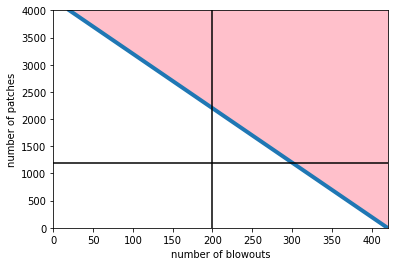

In [6]:

plt.plot(beta, alpha, lw=4)
plt.fill_between(x=beta, y1=alpha,y2=4000, color='pink')
plt.axvline(blowout_lam, color='black')
plt.axhline(patch_lam, color='black')
plt.xlabel('number of blowouts')
plt.ylabel('number of patches')
plt.xlim(0, 421)
plt.ylim(0, 4000)

In [19]:
st.poisson.pmf(210, blowout_lam)

0.021518901312554132

(0, 0.02960761407021703)

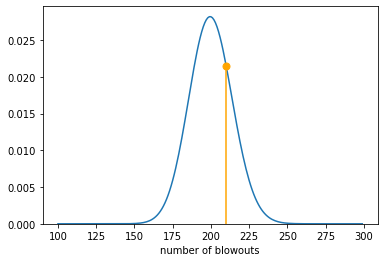

In [18]:
r = np.arange(100, 300)
p210 = st.poisson.pmf(210, blowout_lam)
y = st.poisson.pmf(r, blowout_lam)
plt.plot(r, y)
plt.plot(210, p210, marker='.', markersize=14, color='orange')
plt.axvline(210, 0, 0.02/0.028, color='orange')
plt.xlabel("number of blowouts")
# plt.fill_between(x=r[110:], y1=y[110:], color='orange')
plt.ylim(0)

(0, 0.029607614070217125)

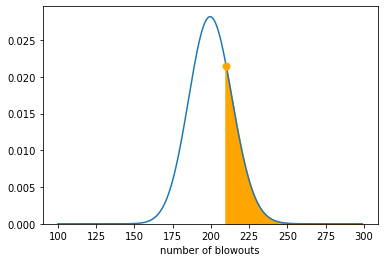

In [12]:
r = np.arange(100, 300)
p210 = st.poisson.pmf(210, blowout_lam)
y = st.poisson.pmf(r, blowout_lam)
plt.plot(r, y)
plt.plot(210, p210, marker='.', markersize=14, color='orange')
plt.axvline(210, 0, 0.02/0.028, color='orange')
plt.xlabel("number of blowouts")
plt.fill_between(x=r[110:], y1=y[110:], color='orange')
plt.ylim(0)

(0, 0.029609642150018756)

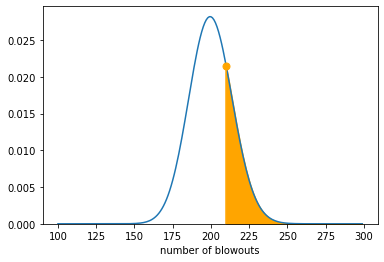

In [814]:

r = np.arange(100, 300)
p210 = st.binom.pmf(k=210, n=n, p=blowout_p)
y = st.binom.pmf(k=r, n=n, p=blowout_p)
plt.plot(r, y,)
plt.plot(210, p210, marker='.', markersize=14, color='orange')
plt.axvline(210, 0, 0.02/0.028, color='orange')
plt.xlabel("number of blowouts")
plt.fill_between(x=r[110:], y1=y[110:], color='orange')
plt.ylim(0)

In [555]:
blowouts = np.arange(0, 421)
patches = np.arange(0, 4201)

combinations = [(p_, b_) for p_ in patches for b_ in blowouts]


bp=[]
pp=[]
joint_prb = []
for p_, b_ in combinations:
    p_prob = np.round(st.binom.pmf(k=p_, n=n, p=patch_p), 5)
    b_prob = np.round(st.binom.pmf(k=b_, n=n, p=blowout_p), 5)
    pp.append(p_prob)
    bp.append(b_prob)
    joint_prb.append(p_prob*b_prob)
    
df = pd.DataFrame({'combinations': combinations, 'joint_probability': joint_prb})    

In [698]:
resultdict = dict(zip(combinations, joint_prb))
df2 = pd.DataFrame(columns=np.arange(0, 421), index=np.arange(4200, -1, -1))

def get_dict_results(i, j):
    return resultdict[(i, j)]

vec = np.vectorize(get_dict_results)


for i in np.arange(0, 421):
    df2[i] = vec(df2[i].index, i)

In [779]:
def below(comb):
    y, x = comb
    f_x = 4200 - 10*x
    if f_x > y:
        return 1
    else:
        return 0

df['patches'] = df.combinations.apply(lambda x: x[0])
df['blowouts'] = df.combinations.apply(lambda x: x[1])

df['below_profit_boundary'] = df.combinations.apply(below)

In [785]:
1 - df[df['below_profit_boundary'] ==1].joint_probability.sum()

4.000000330961484e-10

Text(0.5, 51.0, 'number of blowouts')

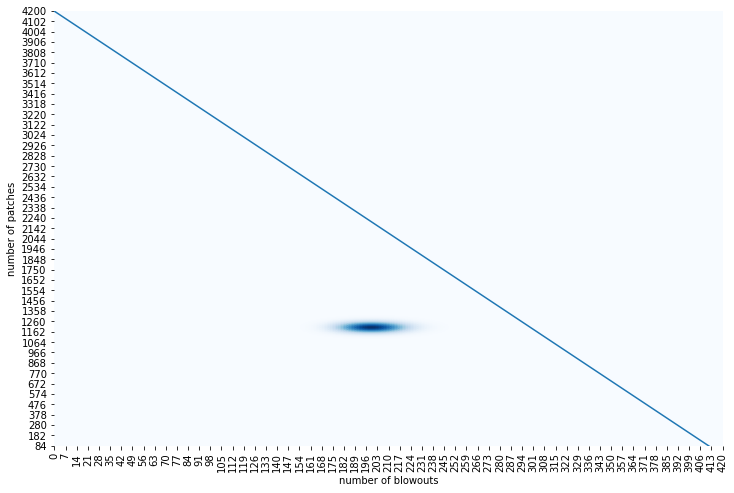

In [745]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.plot(beta, alpha[::-1])

sns.heatmap(df2, cmap="Blues", cbar=False
                )
plt.ylabel('number of patches')
plt.xlabel('number of blowouts')


Text(0.5, 0, 'number of blowouts')

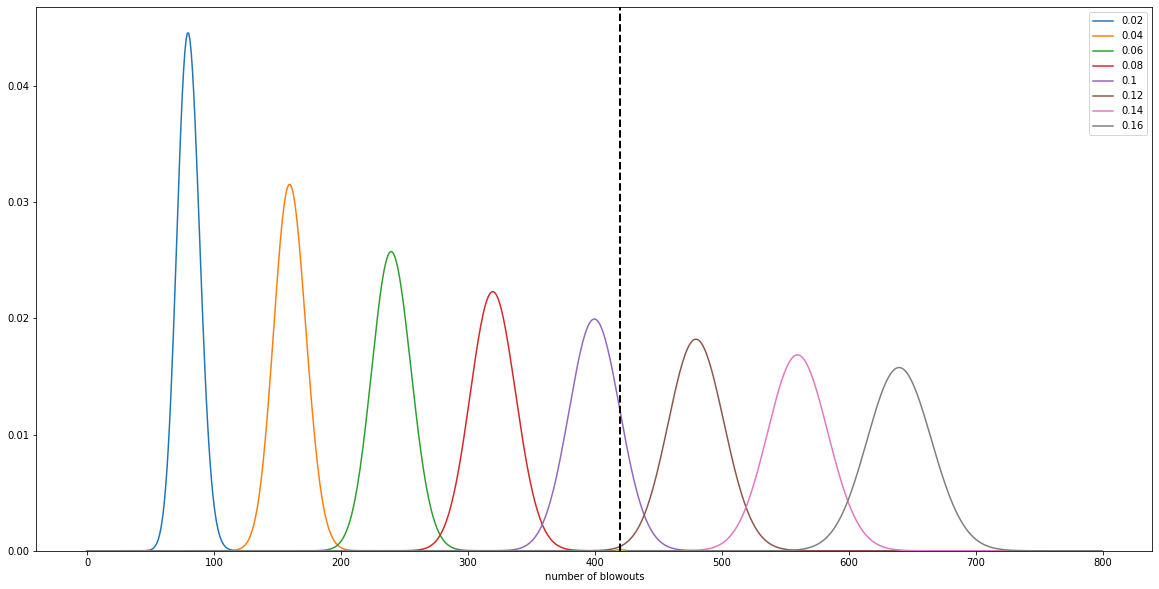

In [816]:
r = np.arange(0, 800)

fig, ax = plt.subplots(figsize=(20, 10))
for p in np.arange(0.02, 0.16, 0.02):
    blowout_p = p/365
    y = st.binom.pmf(k=r, n=n, p=blowout_p)
    plt.plot(r, y, label=np.round(p, 2))

plt.plot((revenue/cost_of_blowout), 0, marker='*', markersize=(10))
plt.axvline((revenue/cost_of_blowout), linestyle='--', color='black', lw=2)
plt.legend()
plt.ylim(0)
plt.xlabel("number of blowouts")

(0, 0.01481249272980003)

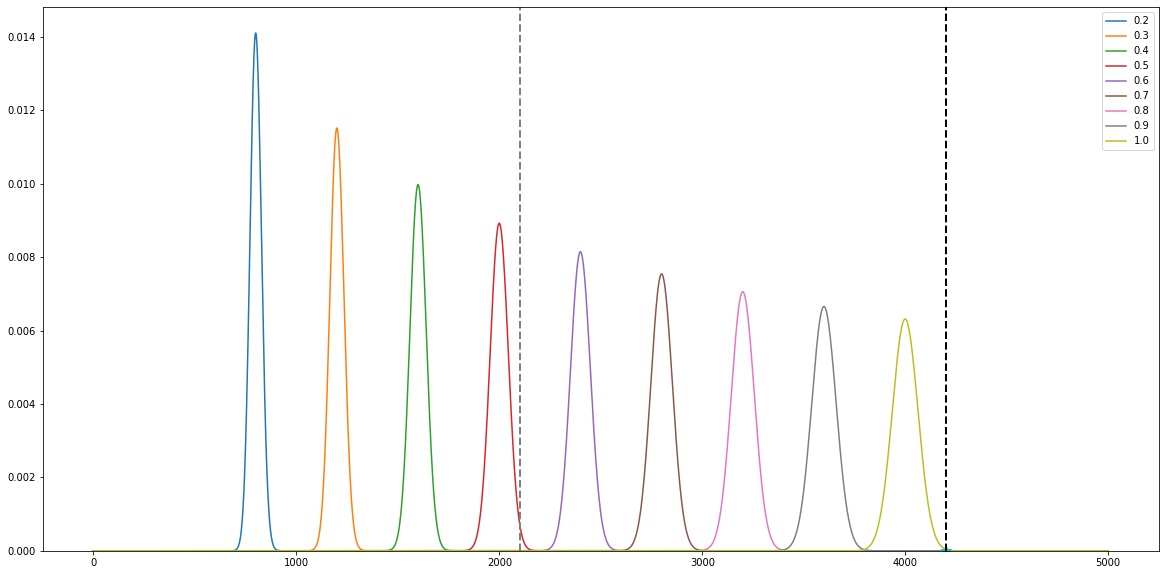

In [817]:
r = np.arange(0, 5000)

fig, ax = plt.subplots(figsize=(20, 10))
for p in np.arange(0.2, 1.1, 0.1):
    patch_p = p/365
    y = st.binom.pmf(k=r, n=n, p=patch_p)
    plt.plot(r, y, label=np.round(p, 2))

plt.plot((revenue/cost_of_patch), 0, marker='*', markersize=(10))
plt.axvline((revenue/cost_of_patch), linestyle='--', color='black', lw=2)
plt.axvline((revenue/cost_of_patch)*0.5, linestyle='--', color='grey', lw=2)
plt.legend()
plt.ylim(0)

In [39]:
blowout_p = 0.05
patch_p = 0.3
n = 4
blowout_lam = blowout_p*n
patch_lam = patch_p*n

def poisson_probs(k, lam, condition='<='):
    if condition == '<=':
        return sum([st.poisson.pmf(i, lam) for i in range(0, k+1)])
    elif condition == '<':
        return sum([st.poisson.pmf(i, lam) for i in range(0, k+1)])
    elif condition == '>=':
        return 1 - sum([st.poisson.pmf(i, lam) for i in range(0, k)])
    elif condition == '>':
        return 1 - sum([st.poisson.pmf(i, lam) for i in range(0, k +1)])
    elif condition == '=':
        return st.poisson.pmf(k, lam)   



b3p0 = poisson_probs(k=3, lam=blowout_lam, condition=">=") \
        * poisson_probs(k=0, lam=patch_lam, condition=">=")
b2p2 = poisson_probs(k=2, lam=blowout_lam, condition="=") \
        * poisson_probs(k=2, lam=blowout_lam, condition=">=")
b1p12 = poisson_probs(k=1, lam=blowout_lam, condition="=") \
        * poisson_probs(k=12, lam=blowout_lam, condition=">=")
b0p22 = poisson_probs(k=1, lam=blowout_lam, condition="=") \
        * poisson_probs(k=22, lam=blowout_lam, condition=">=")
print(np.round(sum([b3p0, b2p2, b1p12, b0p22 ]), 5))

0.00144
